In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy.ma.core import argmin


In [2]:
mobiles_dataset = pd.read_csv("mobiles_dataset.csv")
mobiles_dataset.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


#PART 1:

In [3]:
# 1 PKR = 0.0036 USD
# 1 INR = 0.011 USD
# 1 CNY = 0.14 USD
# 1 AED = 0.27 USD
for col in mobiles_dataset.columns:

    if col == "Launched.Price.Pakistan.PKR":
        x = 0.0036
    elif col == "Launched.Price.India.INR":
        x = 0.011
    elif col == "Launched.Price.China.CNY":
        x = 0.14
    elif col == "Launched.Price.Dubai.AED":
        x = 0.27
    else:
        continue

    mobiles_dataset[col] =mobiles_dataset[col]*x

mobiles_dataset.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024


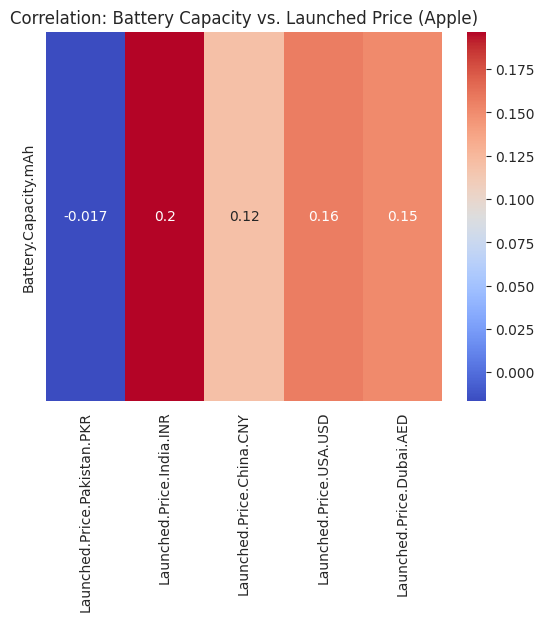

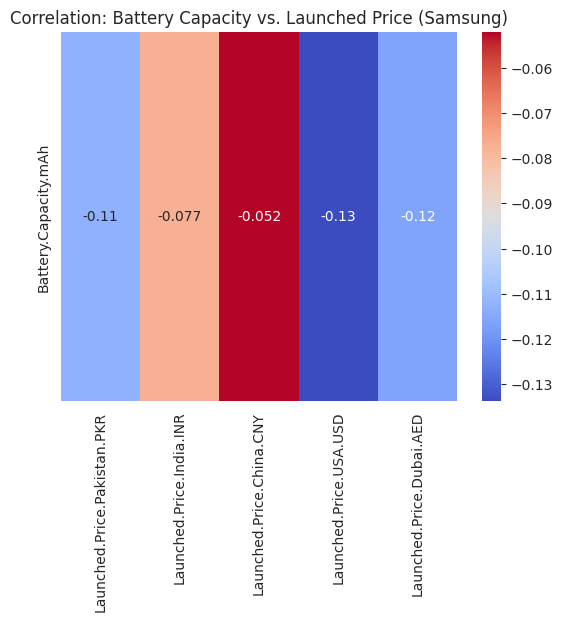

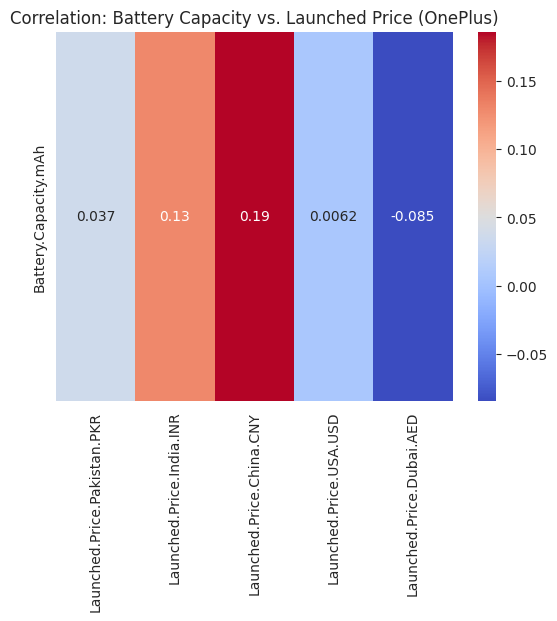

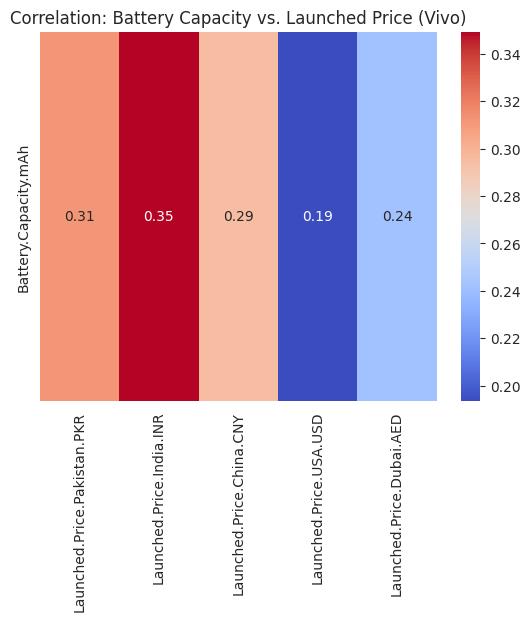

/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


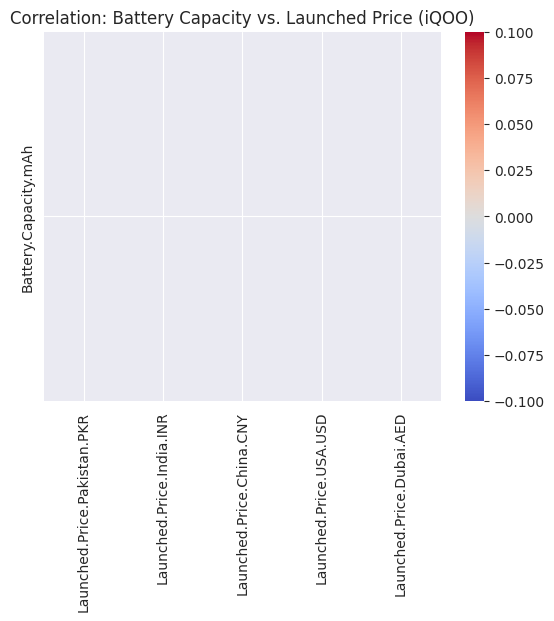

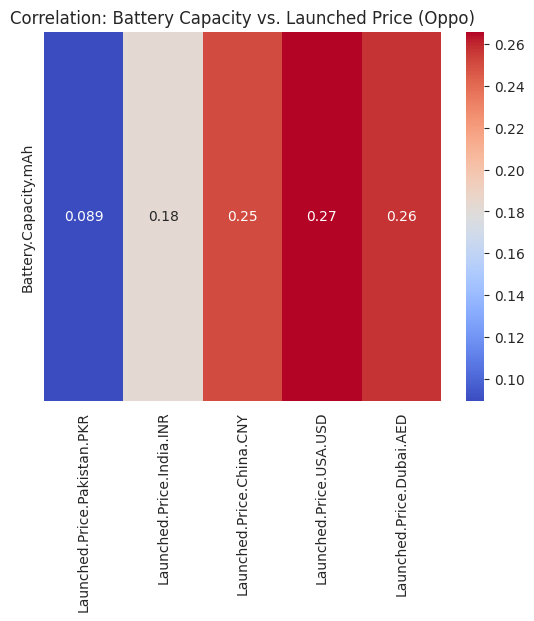

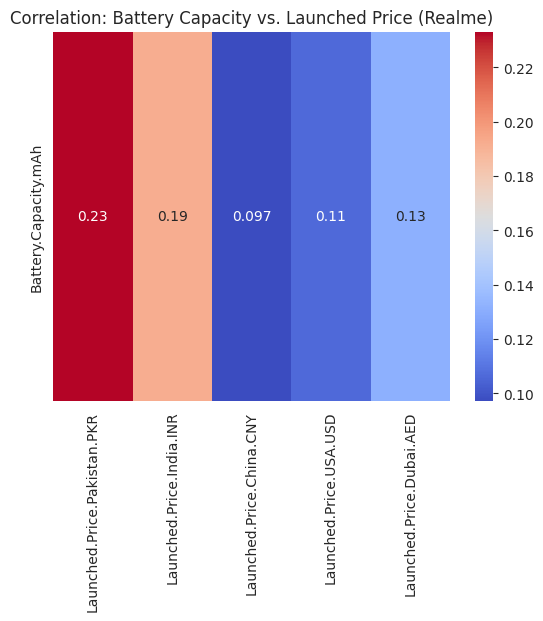

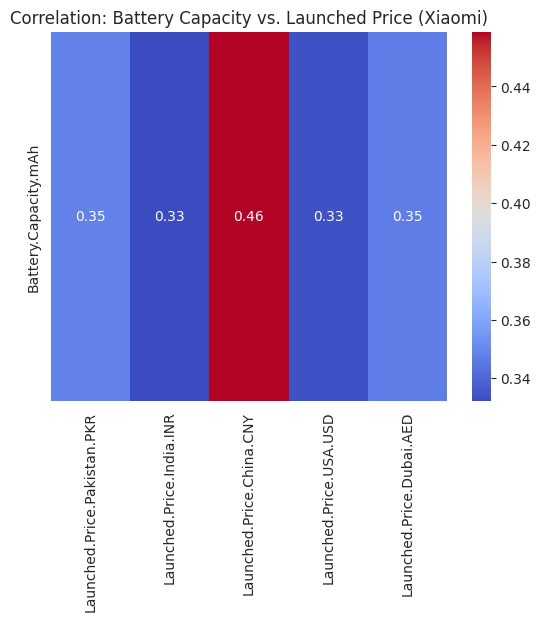

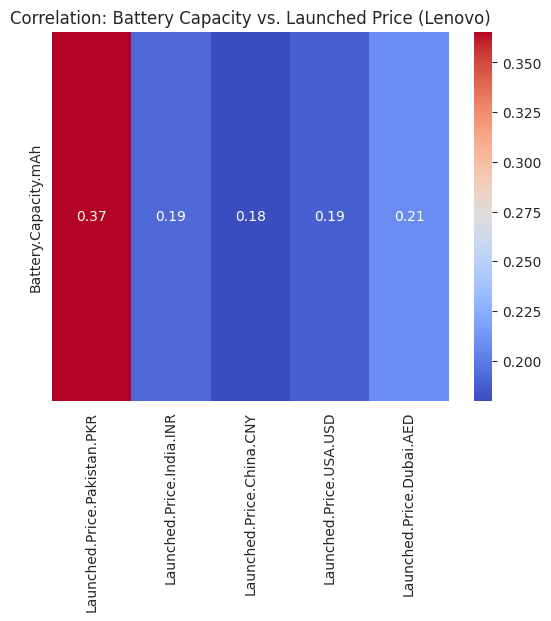

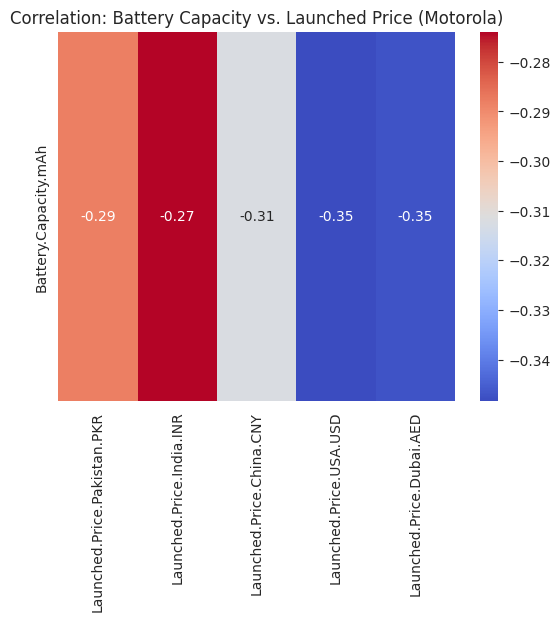

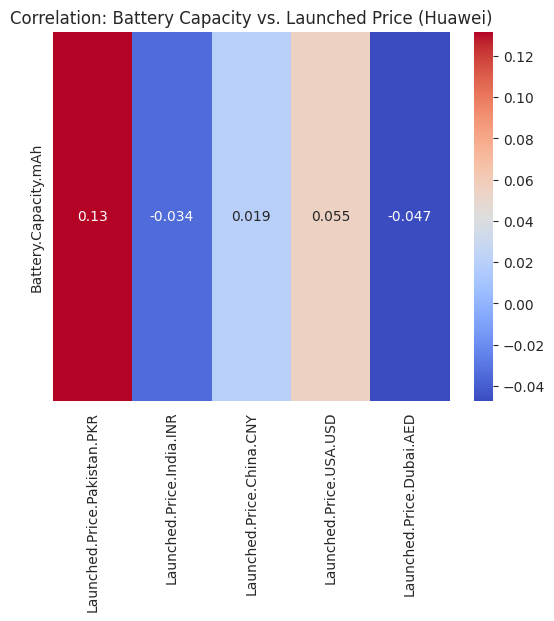

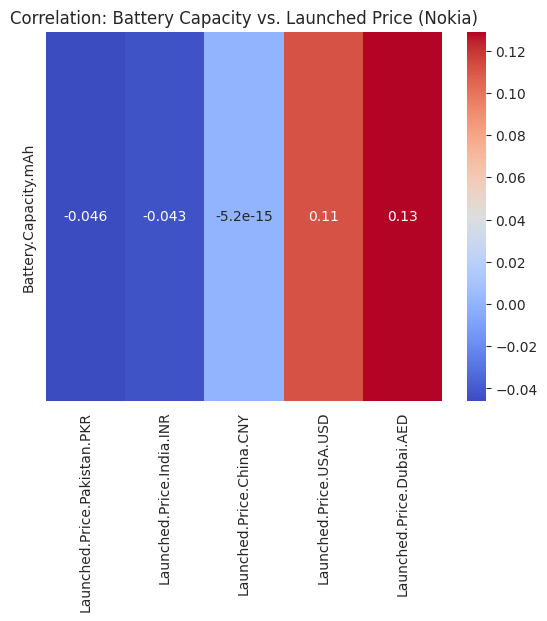

/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


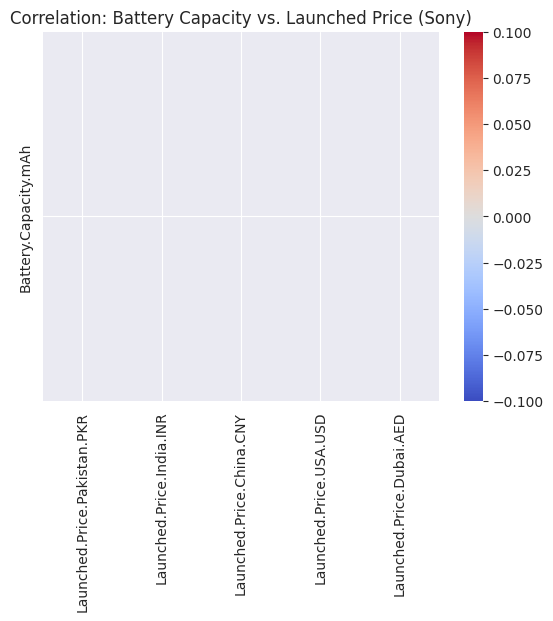

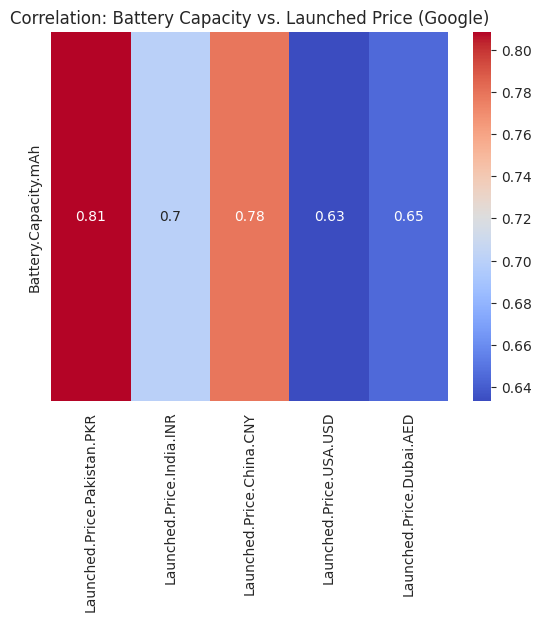

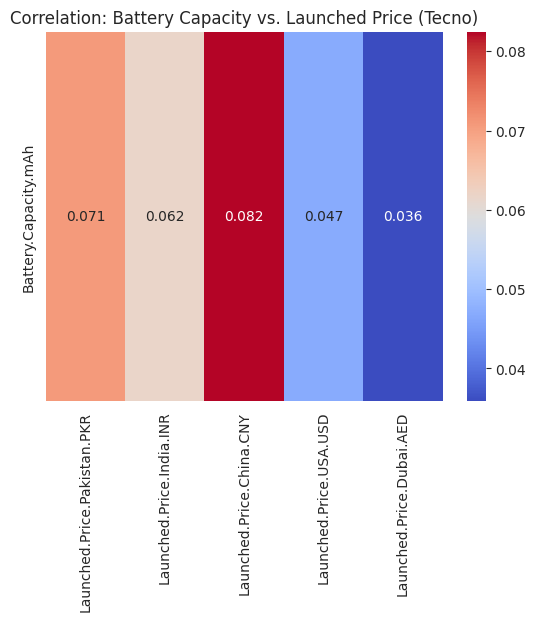

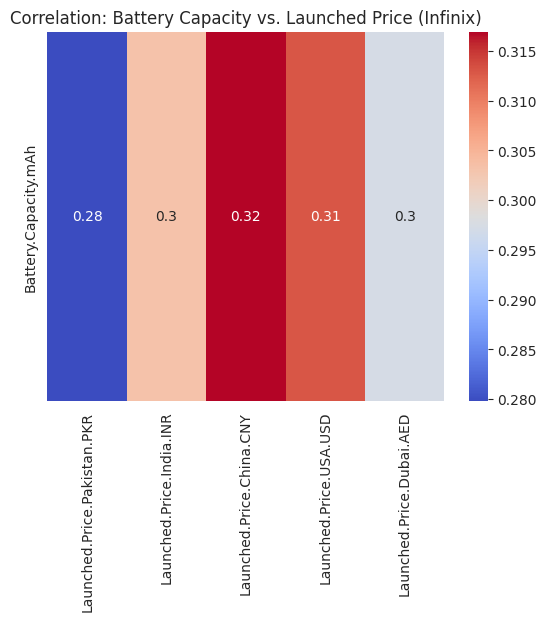

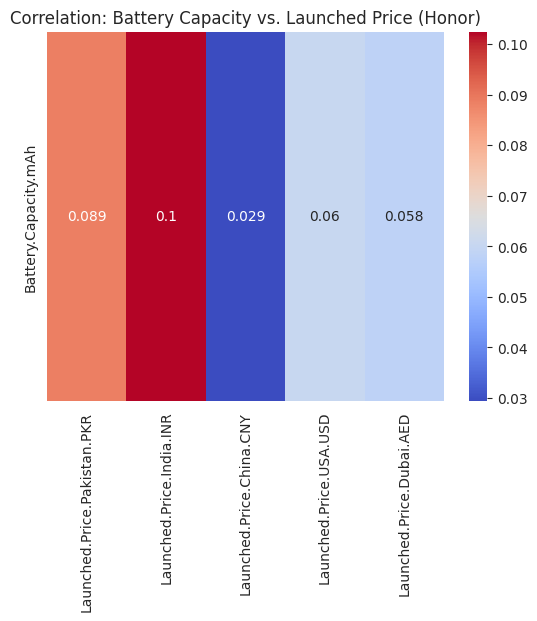

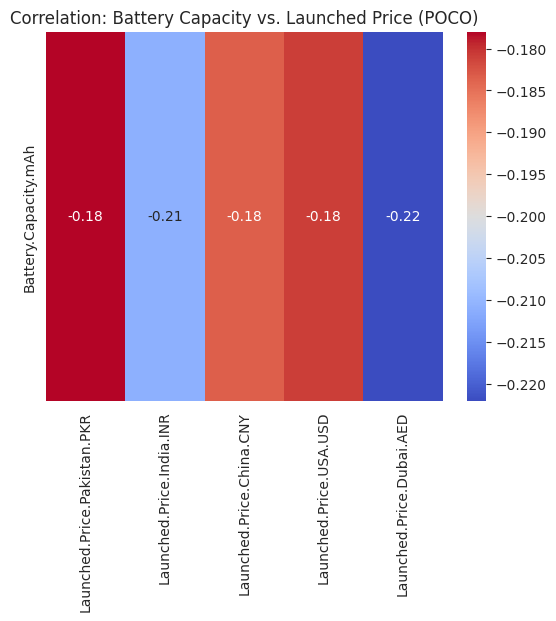

/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


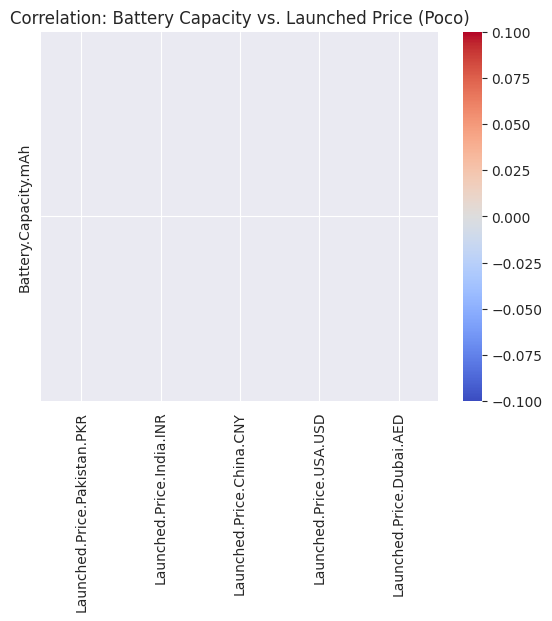

In [4]:
# --1
selected_cols = ["Battery.Capacity.mAh",
                 "Launched.Price.Pakistan.PKR",
                 "Launched.Price.India.INR",
                 "Launched.Price.China.CNY",
                 "Launched.Price.USA.USD",
                 "Launched.Price.Dubai.AED"]
correlation_matrix = mobiles_dataset[selected_cols].corr()
correlation_filtered = correlation_matrix.loc[["Battery.Capacity.mAh"], selected_cols[1:]]
brands = mobiles_dataset["Company.Name"].unique()

for i, brand in enumerate(brands):
    brand_data = mobiles_dataset[mobiles_dataset["Company.Name"] == brand]

    correlation_matrix = brand_data[selected_cols].corr()

    correlation_filtered = correlation_matrix.loc[["Battery.Capacity.mAh"], selected_cols[1:]]

    plt.title(f"Correlation: Battery Capacity vs. Launched Price ({brand})")

    sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm')

    plt.show()


# here You can see each brands correlation with currency and battery size, mostly increase of battery size will not increase the price
# google is an exception it has a kind of good correlation which means with battery size increase the price increases
# the error empty plots are for the brands that has only 1 Battery size option

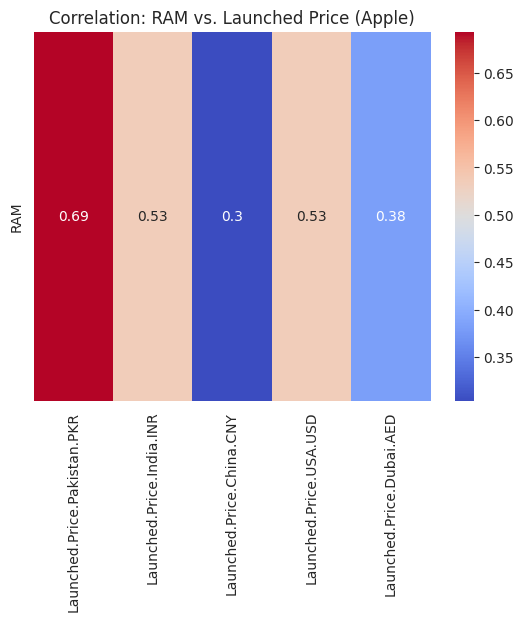

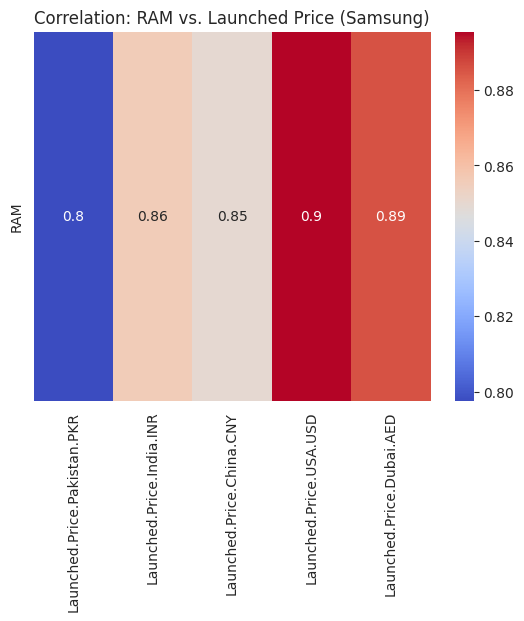

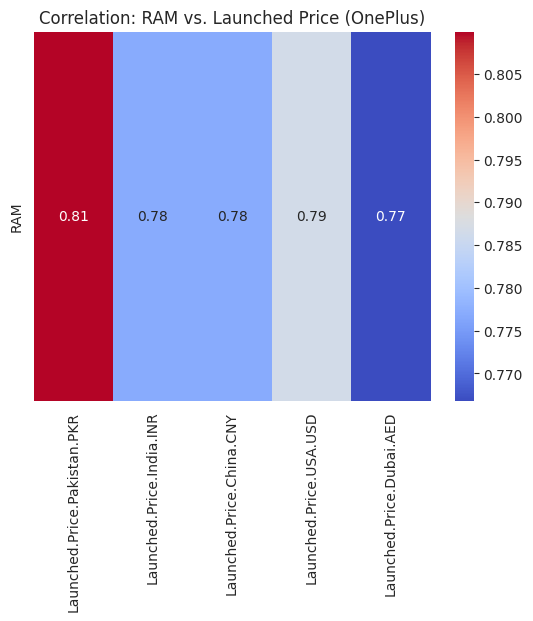

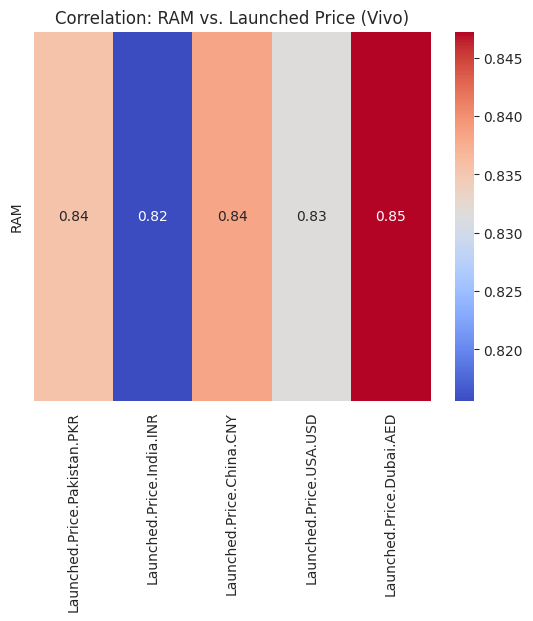

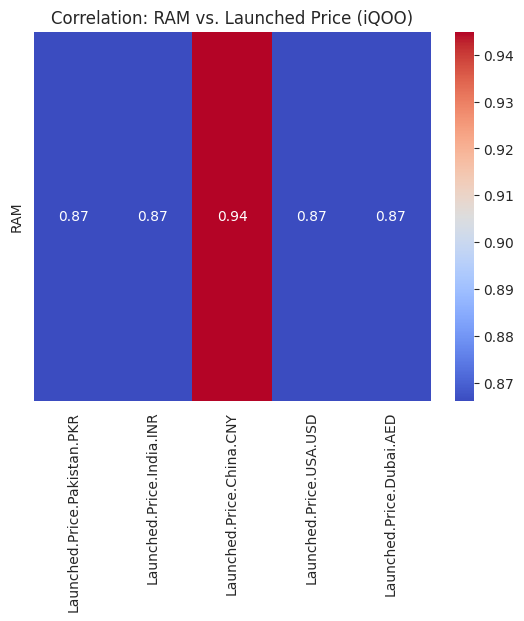

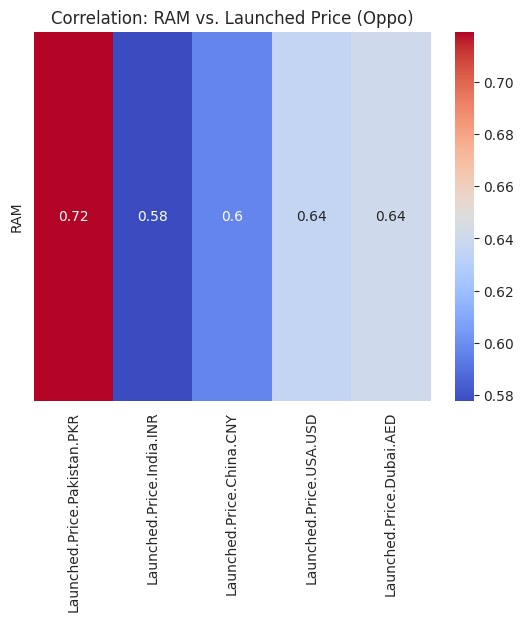

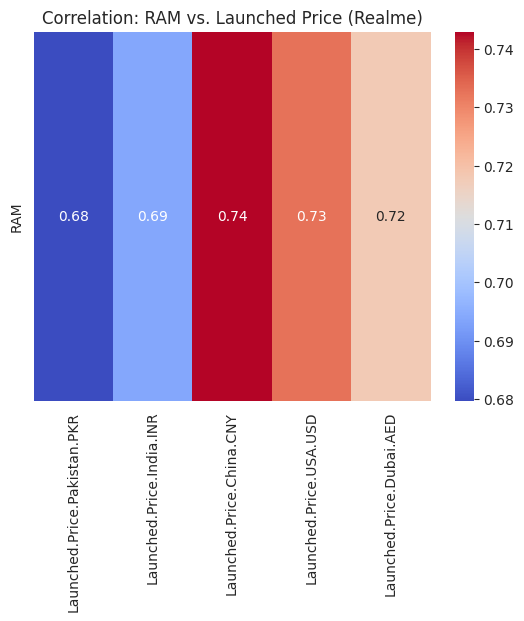

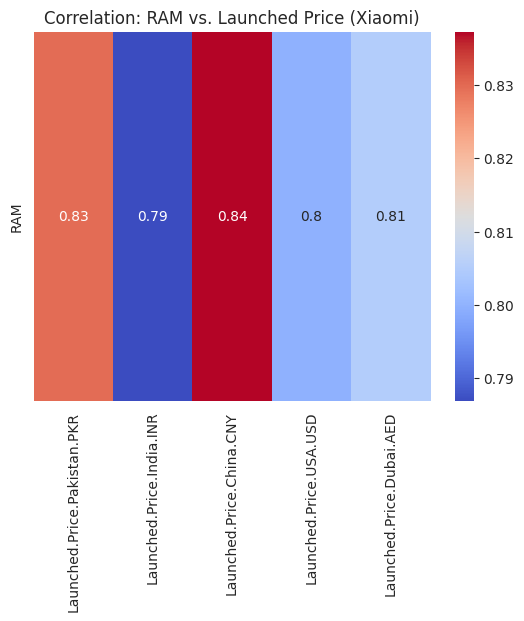

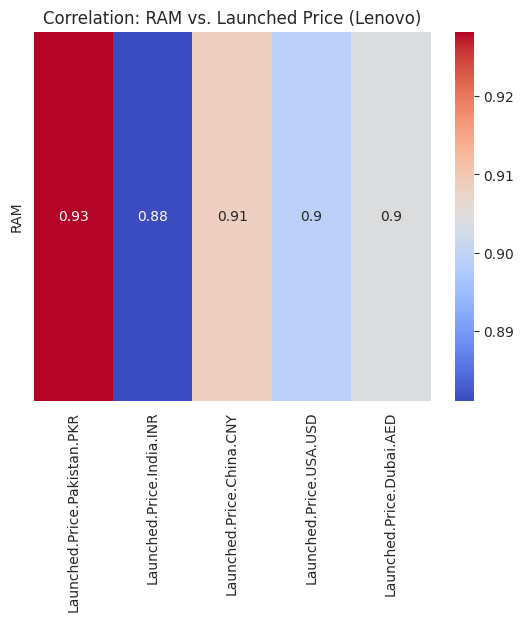

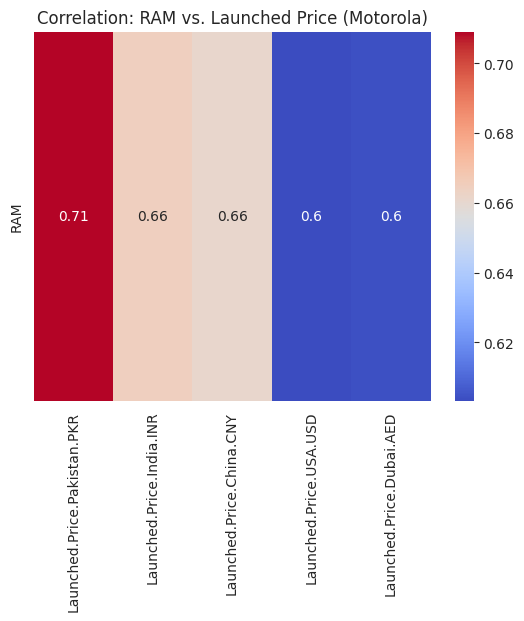

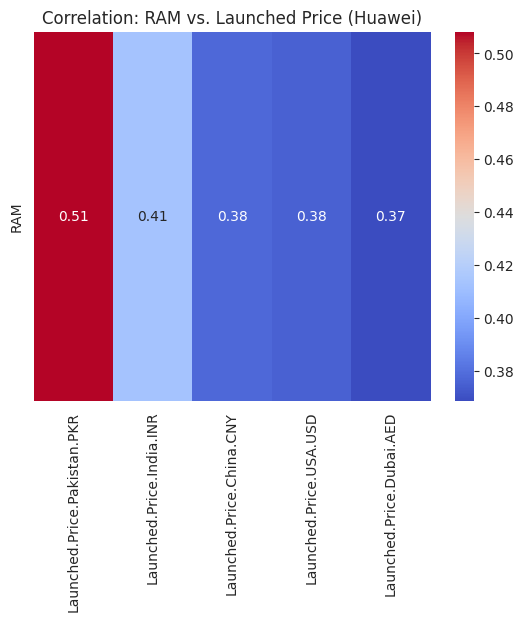

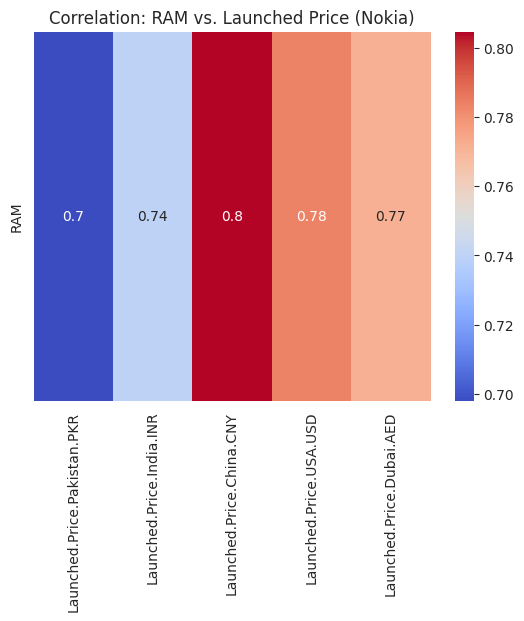

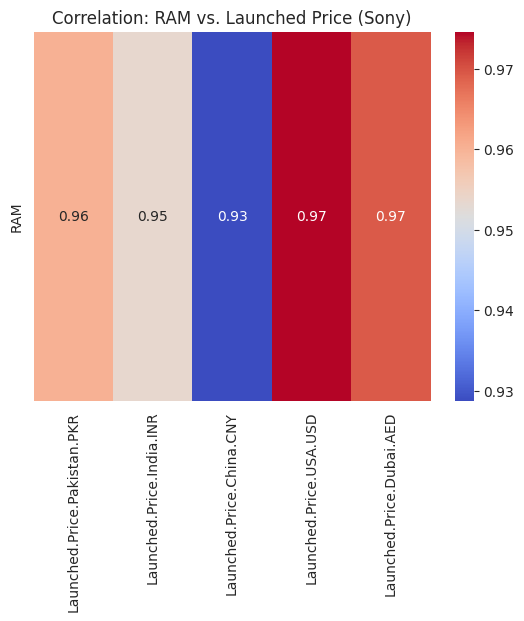

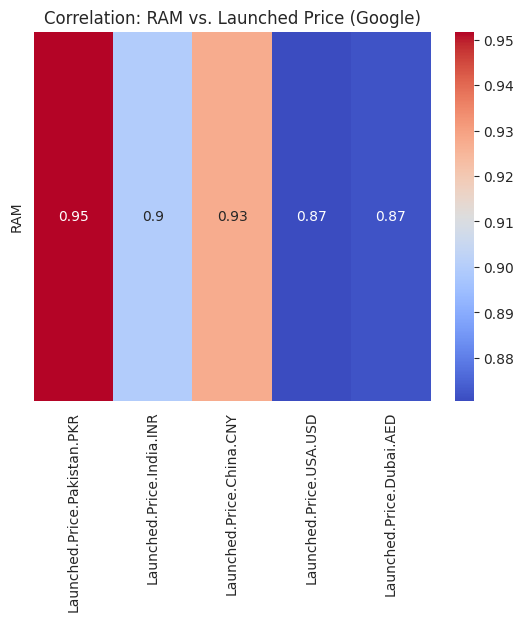

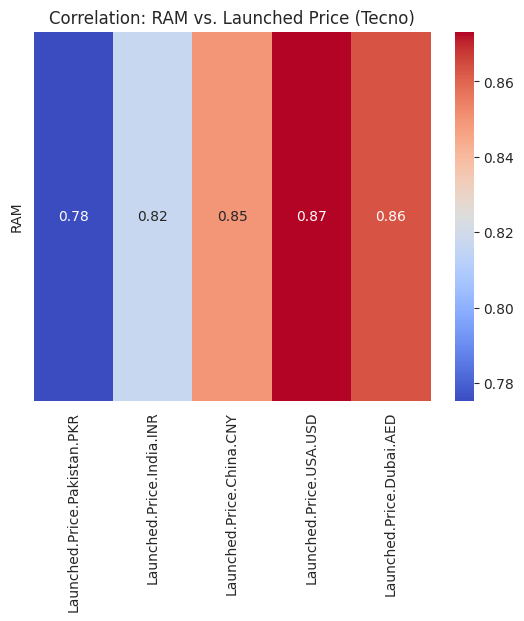

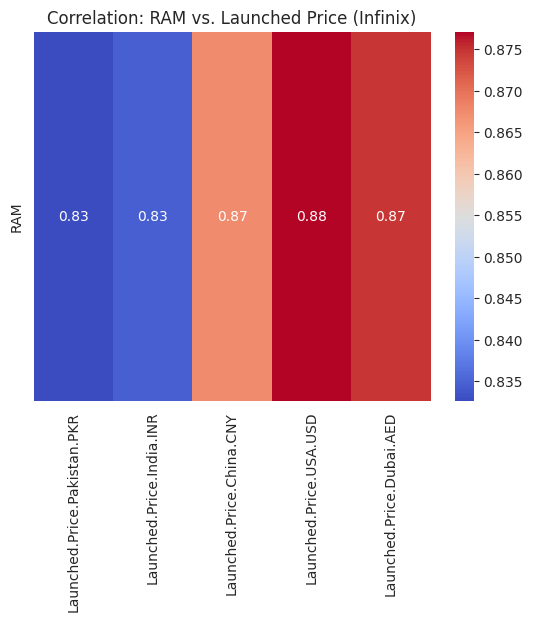

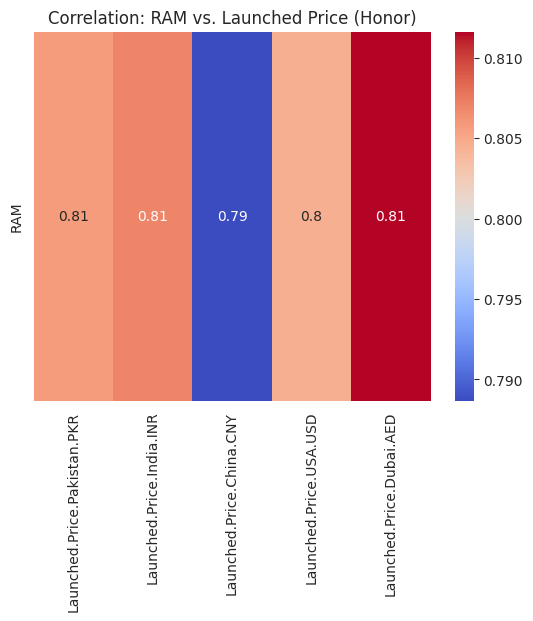

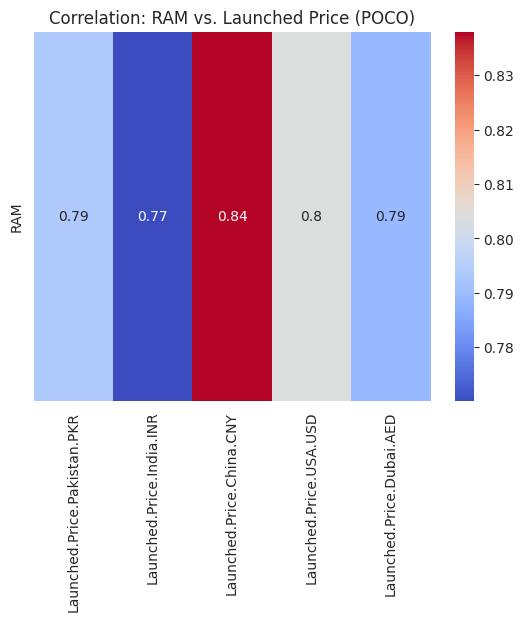

/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/joseph/anaconda3/envs/data-viz/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


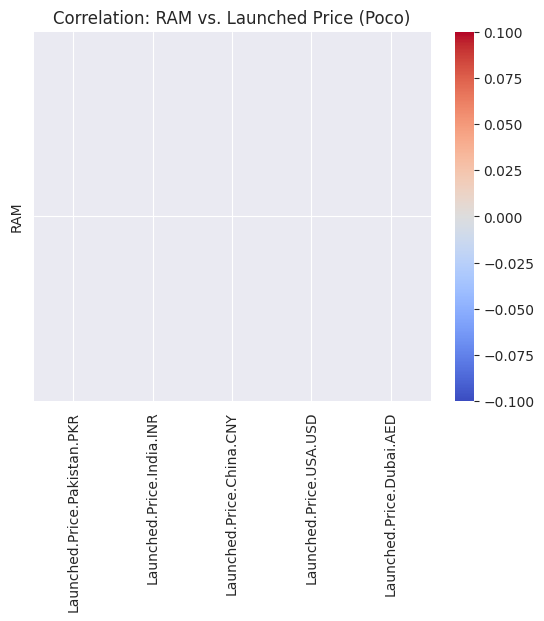

In [5]:
# --2
mobiles_dataset['RAM'] = mobiles_dataset['RAM'].apply(lambda x: x.replace("GB","").replace("/","").replace("8  12","8"))
selected_cols = ["RAM",
                 "Launched.Price.Pakistan.PKR",
                 "Launched.Price.India.INR",
                 "Launched.Price.China.CNY",
                 "Launched.Price.USA.USD",
                 "Launched.Price.Dubai.AED"]
correlation_matrix = mobiles_dataset[selected_cols].corr()
correlation_filtered = correlation_matrix.loc[["RAM"], selected_cols[1:]]
brands = mobiles_dataset["Company.Name"].unique()

for i, brand in enumerate(brands):
    brand_data = mobiles_dataset[mobiles_dataset["Company.Name"] == brand]

    correlation_matrix = brand_data[selected_cols].corr()

    correlation_filtered = correlation_matrix.loc[["RAM"], selected_cols[1:]]

    plt.title(f"Correlation: RAM vs. Launched Price ({brand})")

    sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm')

    plt.show()

# here You can see each brands correlation with currency and RAM, and mostly yes the with RAM increase the prices increases
# the error empty plots are for the brands that has only 1 RAM option

In [6]:
# --3
mobiles_dataset["price_variance"] = mobiles_dataset[
    [
    "Launched.Price.Pakistan.PKR",
    "Launched.Price.India.INR",
    "Launched.Price.China.CNY",
    "Launched.Price.USA.USD",
    "Launched.Price.Dubai.AED"
    ]].std(axis=1)

mean_variance = mobiles_dataset.groupby("Company.Name")["price_variance"].mean()
mean_variance = mean_variance.sort_values(ascending=False)

mean_variance
# as we can see the variance of prices in each region for each company averaged for their different mobile models
# The most variance has Huawei averaged for different device models, and the least is Nokia which is the most stable across different regions

Company.Name
Huawei      216.383338
Sony        147.321703
Apple       115.293230
Samsung     105.132024
Google      103.574508
Vivo         95.136005
Oppo         88.784543
Honor        85.259354
OnePlus      84.161653
Xiaomi       79.138772
iQOO         78.421907
Tecno        77.089597
Motorola     59.253195
Lenovo       47.677392
POCO         47.568004
Infinix      38.085249
Poco         22.437730
Realme       19.574736
Nokia        16.934911
Name: price_variance, dtype: float64

In [7]:
# --4

def categortize_price(row):
    if row["Launched.Price.USA.USD"] <= 300 :
        return "budget"
    elif row["Launched.Price.USA.USD"] > 300 and row["Launched.Price.USA.USD"] <= 700:
        return "mid-range"
    else:
        return "premium"


mobiles_dataset['Category'] = mobiles_dataset.apply(categortize_price, axis=1)

grouped_category_count = mobiles_dataset.groupby(["Company.Name", "Category"]).size().reset_index(name='Count')
print(grouped_category_count)


brand_categories = {}
for _, row in grouped_category_count.iterrows():
    brand_categories[row["Company.Name"]] = set()

for _, row in grouped_category_count.iterrows():
    brand_categories[row["Company.Name"]].add(row["Category"])


for brand_name, categories in brand_categories.items():
    if len(categories) < 3:
        print(f"{brand_name} has only {categories}")

# Bellow will be printed the brand names that do not have all mobile categories, if a brand name is not printed means that it has all the categories

   Company.Name   Category  Count
0         Apple  mid-range      8
1         Apple    premium     89
2        Google  mid-range     12
3        Google    premium      9
4         Honor     budget     29
5         Honor  mid-range     37
6         Honor    premium     25
7        Huawei  mid-range     15
8        Huawei    premium     27
9       Infinix     budget     41
10      Infinix  mid-range     15
11       Lenovo     budget     10
12       Lenovo  mid-range      5
13     Motorola     budget     26
14     Motorola  mid-range     29
15     Motorola    premium      7
16        Nokia     budget     10
17      OnePlus     budget     10
18      OnePlus  mid-range     23
19      OnePlus    premium     20
20         Oppo     budget     46
21         Oppo  mid-range     59
22         Oppo    premium     24
23         POCO     budget     16
24         POCO  mid-range     14
25         Poco     budget      2
26       Realme     budget     44
27       Realme  mid-range     25
28      Samsun

In [8]:
# --5
pakistan_mean = mobiles_dataset["Launched.Price.Pakistan.PKR"].mean()
india_mean = mobiles_dataset["Launched.Price.India.INR"].mean()
china_mean = mobiles_dataset["Launched.Price.China.CNY"].mean()
usa_mean = mobiles_dataset["Launched.Price.USA.USD"].mean()
dubai_mean = mobiles_dataset["Launched.Price.Dubai.AED"].mean()

print(np.argmin([pakistan_mean, india_mean, usa_mean, china_mean, usa_mean, dubai_mean]))
# on average pakistan's prices are the lowest

0


#PART 2:


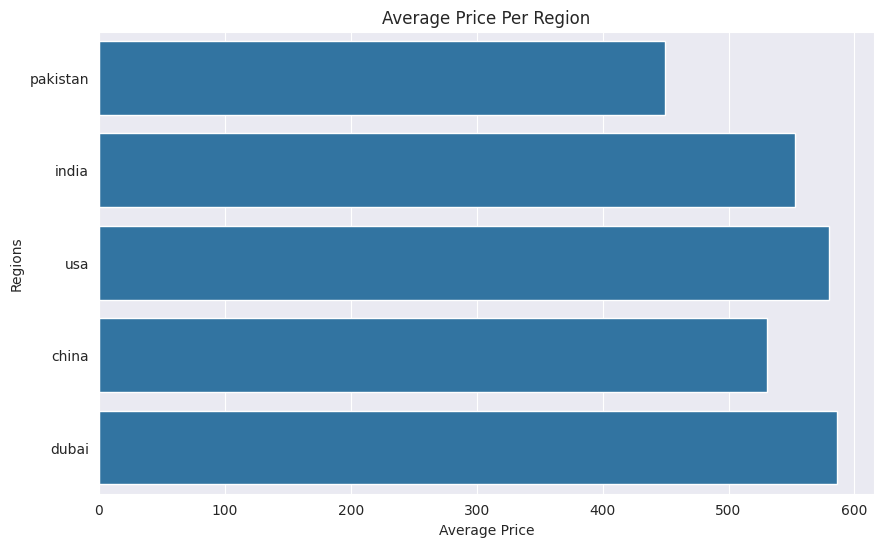

In [9]:
# --1
plt.figure(figsize=(10,6))
sns.barplot( y=["pakistan", "india", "usa", "china", "usa", "dubai"], x=[pakistan_mean, india_mean, usa_mean, china_mean, usa_mean, dubai_mean])
plt.title("Average Price Per Region")
plt.xlabel("Average Price")
plt.ylabel("Regions")
plt.show()

   Company.Name  number_of_phones
0         Apple                97
1        Google                21
2         Honor                91
3        Huawei                42
4       Infinix                56
5        Lenovo                15
6      Motorola                62
7         Nokia                10
8       OnePlus                53
9          Oppo               129
10         POCO                30
11         Poco                 2
12       Realme                69
13      Samsung                84
14         Sony                 9
15        Tecno                39
16         Vivo                86
17       Xiaomi                27
18         iQOO                 3


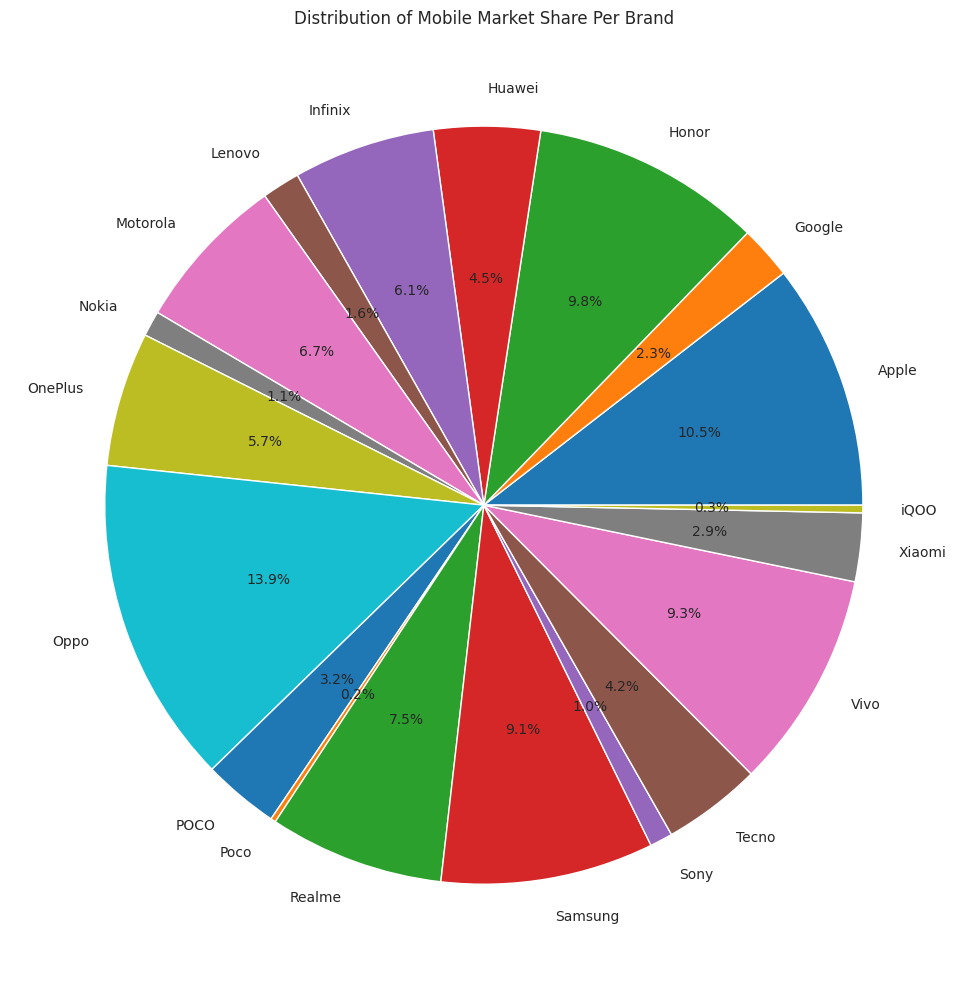

In [10]:
# --2
market_share = mobiles_dataset.groupby("Company.Name").size().reset_index(name='number_of_phones')
print(market_share)
plt.figure(figsize=(10,10))
plt.pie(
    market_share['number_of_phones'],
    labels=market_share["Company.Name"],
    autopct='%1.1f%%',
)
plt.title("Distribution of Mobile Market Share Per Brand")
plt.tight_layout()
plt.show()